<a href="https://colab.research.google.com/github/Neshorn/BBC-News-Classification/blob/main/BBC_News_Dataset_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn scikit-learn transformers tensorflow

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification



In [ ]:
data = pd.read_csv('/content/BBC News Train.csv', delimiter=',')


Reading the data

In [ ]:
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


Data cleaning

In [ ]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    return text

data['cleaned_text'] = data['Text'].apply(clean_text)


print(data['Category'].value_counts())

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


Exploratory Data Analysis

<ipython-input-9-3dac5570d439>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Category', palette='viridis')


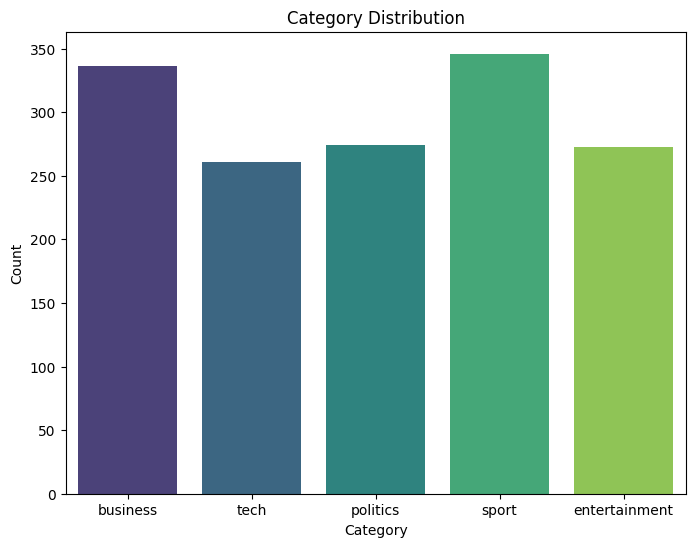

In [ ]:
# Visualizing the  category distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Category', palette='viridis')
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


Feature Extraction (TF-IDF)

In [ ]:
# Converting text into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data['cleaned_text']).toarray()
y = data['Category']

# Encoding the  labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Selection

Logistic Regression Performance:
               precision    recall  f1-score   support

     business       0.94      0.99      0.96        75
entertainment       0.98      0.98      0.98        46
     politics       0.96      0.95      0.95        56
        sport       1.00      1.00      1.00        63
         tech       1.00      0.95      0.97        58

     accuracy                           0.97       298
    macro avg       0.98      0.97      0.97       298
 weighted avg       0.97      0.97      0.97       298



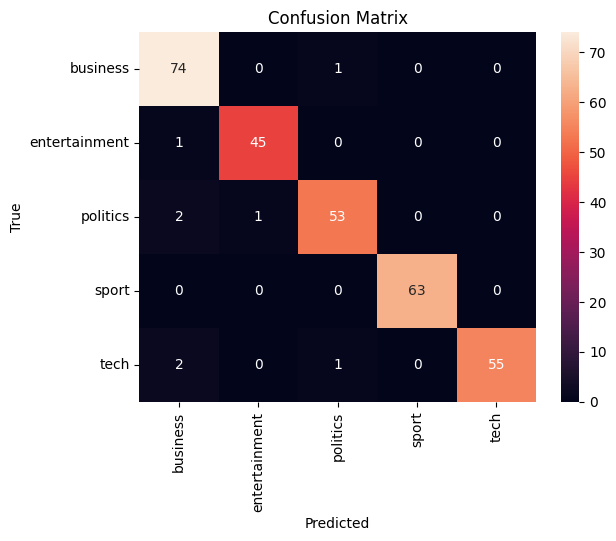

In [ ]:
# Logistic Regression Modeling
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Evaluation
y_pred = lr_model.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


LSTM Model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.2303 - loss: 1.6040 - val_accuracy: 0.3322 - val_loss: 1.4705
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5005 - loss: 1.2360 - val_accuracy: 0.7685 - val_loss: 0.6813
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8221 - loss: 0.6139 - val_accuracy: 0.7886 - val_loss: 0.5973
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8664 - loss: 0.4072 - val_accuracy: 0.7383 - val_loss: 0.7665
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8935 - loss: 0.3154 - val_accuracy: 0.8523 - val_loss: 0.4508
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9747 - loss: 0.1200 - val_accuracy: 0.8658 - val_loss: 0.4401
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9822 - loss: 0.0809 - val_accuracy: 0.8926 - val_loss: 0.4517
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9830 - loss: 0.0700 - val_accuracy: 0.8859 - 

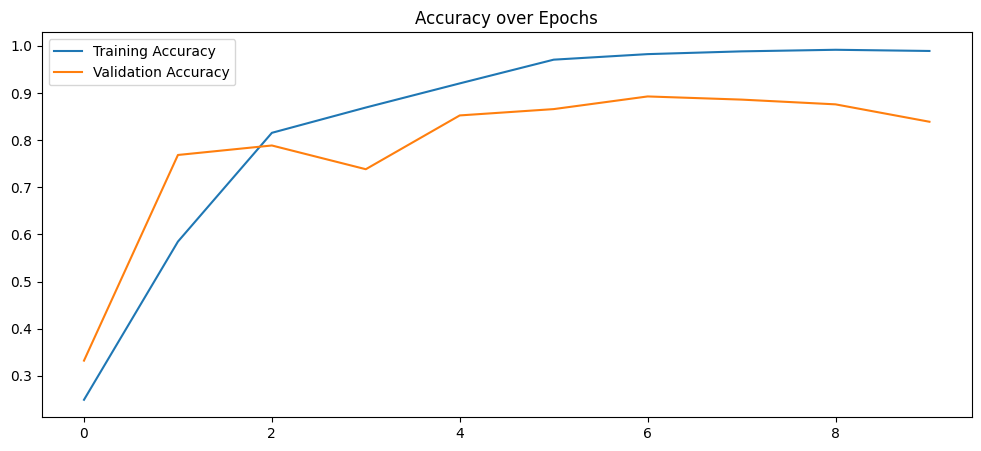

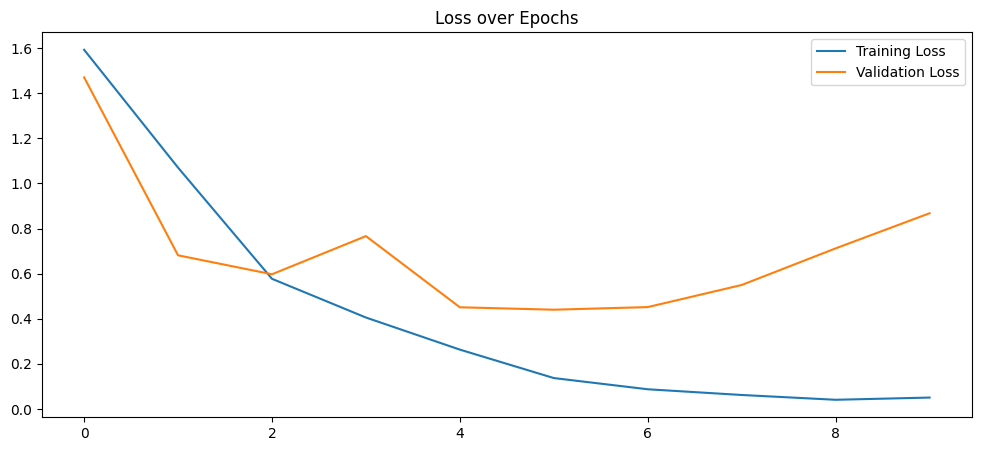

In [ ]:
# Import necessary libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential # Import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout # Import layers

# Tokenization and Padding for Deep Learning
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['cleaned_text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(data['cleaned_text'])

# Pad sequences to a uniform length
X_padded = pad_sequences(sequences, padding='post', maxlen=100) # Assuming a maximum length of 100

# Train-test split
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_padded, y, test_size=0.2, random_state=42)


# LSTM Model
model = Sequential([
    Embedding(5000, 128, input_length=100),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Training the model
history = model.fit(X_train_dl, y_train_dl, epochs=10, validation_data=(X_test_dl, y_test_dl), batch_size=32)

# Plotting training and validation accuracy/loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.show()

Transformers (BERT)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
75/75 [==============================] - 79s 489ms/step - loss: 5.3761 - accuracy: 0.1804 - val_loss: 5.4429 - val_accuracy: 0.1946
Epoch 2/3
75/75 [==============================] - 35s 467ms/step - loss: 4.9155 - accuracy: 0.1711 - val_loss: 5.4429 - val_accuracy: 0.1946
Epoch 3/3
10/10 [==============================] - 3s 270ms/step - loss: 5.4429 - accuracy: 0.1946
BERT Model Accuracy: 0.19463087618350983


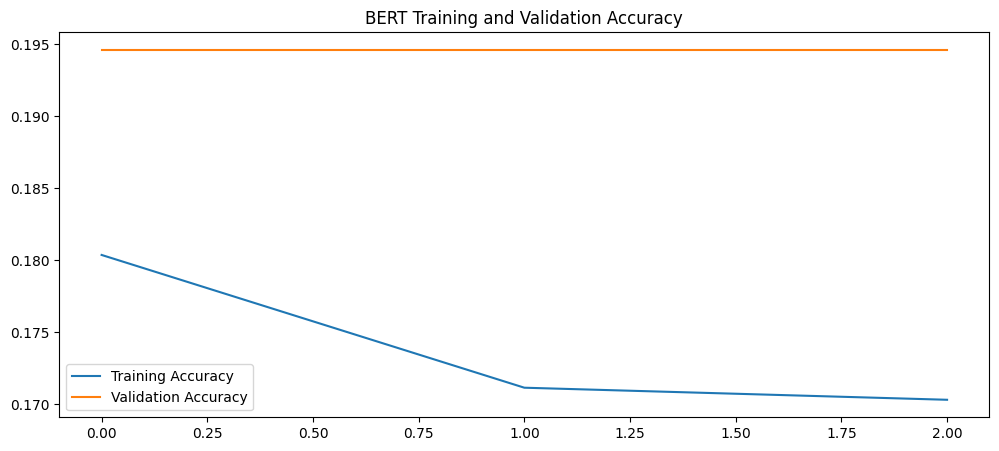

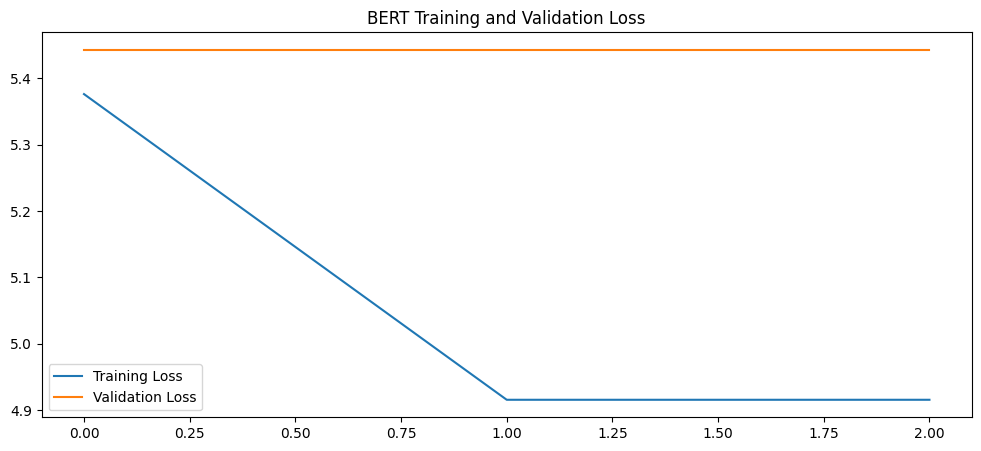

10/10 [==============================] - 5s 256ms/step
BERT Classification Report:
               precision    recall  f1-score   support

     business       0.00      0.00      0.00        75
entertainment       0.00      0.00      0.00        46
     politics       0.00      0.00      0.00        56
        sport       0.00      0.00      0.00        63
         tech       0.19      1.00      0.33        58

     accuracy                           0.19       298
    macro avg       0.04      0.20      0.07       298
 weighted avg       0.04      0.19      0.06       298



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Tokenization function for BERT
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def bert_tokenize(texts):
    return tokenizer(
        list(texts),
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors="tf"
    )

# Train-test split for BERT
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
X_train_bert = bert_tokenize(train_data['cleaned_text'])
X_test_bert = bert_tokenize(test_data['cleaned_text'])
y_train_bert = label_encoder.transform(train_data['Category'])
y_test_bert = label_encoder.transform(test_data['Category'])

# Load pre-trained BERT model
bert_model = TFAutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(label_encoder.classes_)
)

# Compile BERT model
bert_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the BERT model
bert_history = bert_model.fit(
    {'input_ids': X_train_bert['input_ids'], 'attention_mask': X_train_bert['attention_mask']},
    y_train_bert,
    validation_data=(
        {'input_ids': X_test_bert['input_ids'], 'attention_mask': X_test_bert['attention_mask']},
        y_test_bert
    ),
    epochs=3,
    batch_size=16
)

# Evaluate BERT model
bert_results = bert_model.evaluate(
    {'input_ids': X_test_bert['input_ids'], 'attention_mask': X_test_bert['attention_mask']},
    y_test_bert
)
print(f"BERT Model Accuracy: {bert_results[1]}")

# Plot BERT training accuracy and loss
plt.figure(figsize=(12, 5))
plt.plot(bert_history.history['accuracy'], label='Training Accuracy')
plt.plot(bert_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("BERT Training and Validation Accuracy")
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(bert_history.history['loss'], label='Training Loss')
plt.plot(bert_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("BERT Training and Validation Loss")
plt.show()

# BERT Classification Report
y_pred_bert = np.argmax(bert_model.predict(
    {'input_ids': X_test_bert['input_ids'], 'attention_mask': X_test_bert['attention_mask']}
).logits, axis=1)

print("BERT Classification Report:")
print(classification_report(y_test_bert, y_pred_bert, target_names=label_encoder.classes_))


Compare Results

In [ ]:
# prompt: Combine all model results (Logistic Regression, LSTM, and BERT) into a comparison table to analyze performance.

# Create a dictionary to store the results
results = {
    'Model': ['Logistic Regression', 'LSTM', 'BERT'],
    'Accuracy': [],
    # Add other metrics as needed (precision, recall, F1-score)
}

# Logistic Regression Results
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
results['Accuracy'].append(accuracy_lr)


# LSTM Results
lstm_loss, lstm_accuracy = model.evaluate(X_test_dl, y_test_dl, verbose=0)
results['Accuracy'].append(lstm_accuracy)

# BERT Results
results['Accuracy'].append(bert_results[1])

# Create a DataFrame for the comparison table
comparison_table = pd.DataFrame(results)

# Display the table
comparison_table

,Model,Accuracy
0,Logistic Regression,0.973154
1,LSTM,0.838926
2,BERT,0.194631
